<br>

# Introdução

In [22]:
import os
import time
import ctypes
import datetime
import numpy as np
import pandas as pd
import dask.dataframe as dd
import pyarrow.parquet as pq

<br>

# Gráfico

In [23]:
# Parameters
pto_mon = 'PCAB02220'
parametro = 'Oxigênio Dissolvido'

# Paths
input_path = os.path.join('..', 'data', 'amostras')
filter_path = os.path.join(
    input_path,
    'cod_ponto={}'.format(pto_mon),
    'parametro={}'.format(parametro),
    '*.parquet'
)

In [24]:
# Set Filters
filters = [
    ('cod_ponto', '==', pto_mon),
    ('parametro', '==', parametro),
]

# Read Dataframes
df = dd.read_parquet(
    os.path.join(filter_path),
    #filters=filters,
)

# Calculate
df = df.compute()
df['valor'] = pd.to_numeric(df['valor'].str.replace(',', '.'), errors='ignore')
df.reset_index(inplace=True, drop=True)
df.sort_values(by=['data_coleta'], ascending=True, inplace=True)

# Results
print(len(df))
print(df.dtypes)
df.head()

155
data_coleta       datetime64[ns]
hora_coleta               object
sinal                     object
valor                    float64
unidade                   object
tipo_parametro            object
cod_ponto               category
parametro               category
dtype: object


,data_coleta,hora_coleta,sinal,valor,unidade,tipo_parametro,cod_ponto,parametro
0,1995-01-25,07:20:00,None,2.4,mg/L,3- Químicos,PCAB02220,Oxigênio Dissolvido
1,1995-05-17,08:30:00,None,4.1,mg/L,3- Químicos,PCAB02220,Oxigênio Dissolvido
2,1995-06-21,09:10:00,None,3.1,mg/L,3- Químicos,PCAB02220,Oxigênio Dissolvido
3,1995-07-26,08:40:00,None,1.6,mg/L,3- Químicos,PCAB02220,Oxigênio Dissolvido
4,1995-09-05,09:00:00,None,1.1,mg/L,3- Químicos,PCAB02220,Oxigênio Dissolvido


<AxesSubplot:xlabel='data_coleta', ylabel='valor'>

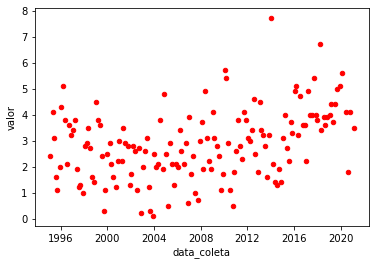

In [25]:
df.plot(kind='scatter', x='data_coleta', y='valor', color='red')

<br>

# Export

In [26]:
# Parameters
pto_mon = 'PCAB02220'
parametro = ''

# Paths
input_path = os.path.join('..', 'data', 'amostras')
filter_path = os.path.join(
    input_path,
    'cod_ponto={}'.format(pto_mon),
    'parametro={}'.format('*' if parametro == '' else parametro),
    '*.parquet'
)
filter_path

'../data/amostras/cod_ponto=PCAB02220/parametro=*/*.parquet'

In [21]:
# Set Filters
filters = [
    ('cod_ponto', '==', pto_mon),
    #('parametro', '==', parametro),
]

# Read Dataframes
df = dd.read_parquet(
    os.path.join(filter_path),
    filters=filters,
)

# Calculate
df = df.compute()
#df['valor'] = pd.to_numeric(df['valor'].str.replace(',', '.'), errors='ignore')
df.reset_index(inplace=True, drop=True)
df.sort_values(by=['data_coleta'], ascending=True, inplace=True)

# Results
print(len(df))
print(df.dtypes)
df.head()

6386
data_coleta       datetime64[ns]
hora_coleta               object
sinal                     object
valor                     object
unidade                   object
tipo_parametro            object
cod_ponto               category
parametro               category
dtype: object


,data_coleta,hora_coleta,sinal,valor,unidade,tipo_parametro,cod_ponto,parametro
6224,1995-01-25,07:20:00,None,6.60000000,U.pH,3- Químicos,PCAB02220,pH
1553,1995-01-25,07:20:00,None,130000.00000000,NMP/100mL,4- Microbiológicos,PCAB02220,Coliformes Totais - TTM
3960,1995-01-25,07:20:00,None,1.43000000,mg/L,3- Químicos,PCAB02220,Nitrogênio Kjeldahl
3626,1995-01-25,07:20:00,<,0.00020000,mg/L,3- Químicos,PCAB02220,Mercúrio Total
5501,1995-01-25,07:20:00,None,20.00000000,ºC,2- Físicos,PCAB02220,Temperatura da Água


In [19]:
# Write to Excel
output_path = os.path.join('..', 'data', 'output')
os.makedirs(output_path, exist_ok=True)

df.to_excel(
    os.path.join(output_path, '{}.xlsx'.format(pto_mon)),
    index=False,
)